In [1]:
# 다익스트라 알고리즘 pythonb

graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}


In [2]:
import heapq  # 우선순위 큐 구현을 위함

def dijkstra(graph, start):
  distances = {node: float('inf') for node in graph}  # start로 부터의 거리 값을 저장하기 위함
  distances[start] = 0  # 시작 값은 0이어야 함
  queue = []
  heapq.heappush(queue, [distances[start], start])  # 시작 노드부터 탐색 시작 하기 위함.

  while queue:  # queue에 남아 있는 노드가 없으면 끝
    current_distance, current_destination = heapq.heappop(queue)  # 탐색 할 노드, 거리를 가져옴.

    if distances[current_destination] < current_distance:  # 기존에 있는 거리보다 길다면, 볼 필요도 없음
      continue
    
    for new_destination, new_distance in graph[current_destination].items():
      distance = current_distance + new_distance  # 해당 노드를 거쳐 갈 때 거리
      if distance < distances[new_destination]:  # 알고 있는 거리 보다 작으면 갱신
        distances[new_destination] = distance
        heapq.heappush(queue, [distance, new_destination])  # 다음 인접 거리를 계산 하기 위해 큐에 삽입
    
  return distances


In [3]:
print(dijkstra(graph, 'A'))

{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}


# 배낭채우기 동적 계획법

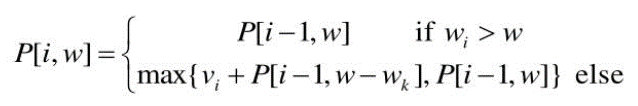

#### 직관적으로 무게 당 값어치가 가장 큰 아이템을 배낭에 넣는 것이 가장 최적이므로 탐욕적인 방법으로 배낭을 빈틈없이 채우는 것은 최적의 해를 만들어 낸다.

In [4]:
import sys

def knapsack(W, wt, val, n):  # W: 배낭의 무게한도, wt: 각 보석의 무게, val: 각 보석의 가격, n: 보석의 수
    K = [[0 for x in range(W+1)] for x in range(n+1)]  # DP를 위한 2차원 리스트 초기화
    for i in range(n+1):
        for w in range(W+1):  # 각 칸을 돌면서
            if i==0 or w==0:  # 0번째 행/열은 0으로 세팅
                K[i][w] = 0
            elif wt[i-1] <= w:  # 점화식을 그대로 프로그램으로
                K[i][w] = max(val[i-1]+K[i-1][w-wt[i-1]], K[i-1][w])  # max 함수 사용하여 큰 것 선택
            else:
                K[i][w] = K[i-1][w]
    return K[n][W]

    wt = []
    val = []
    N, K = map(int, sys.stdin.readline().strip().split())
    for i in range(N):
        w, v = map(int, sys.stdin.readline().strip().split())
        wt.append(w)
        val.append(v)
    print(knapsack(K, wt, val, N))

In [5]:
def n_queens (i, col):
    n = len(col) - 1
    if (promising(i, col)):
        if (i == n):
            print(col[1: n+1])
        else:
            for j in range(1, n+1):
                col[i + 1] = j
                n_queens(i+1, col)
                
def promising (i, col):
    k = 1
    flag = True
    while(k<i and flag):
        if(col[i] == col[k] or abs(col[i] - col[k]) == (i-k)):
            flag = False
        k += 1
     
    return flag
     
n = 4
col = [0] * (n+1)
n_queens(0,col)


[2, 4, 1, 3]
[3, 1, 4, 2]


In [ ]:
# 되추적 알고리즘으로 구현한 배낭채우기 

n=5
p=[0,20,30,35,12,3,0]
w=[0,2,5,7,3,1,0]
pw=[0,10,6,5,4,3,0]
include = [0,0,0,0,0,0,0,0,0,0,0,0]
W=12
bound=75
maxprofit=0
bestset = []
def promising(i,profit,weight):
    j=0
    k=0
    totweight=0
    if(weight>=W):
        return 0
    else :
        j = i + 1
        bound = profit
        totweight=weight
        while(j<=n and totweight+w[j]<=W):
            totweight = totweight + w[j]
            bound = bound + p[j]
            j = j + 1
        k=j
        if(k<=n):
            bound = bound + (W - totweight)*(p[k]/w[k])
        if(bound>maxprofit):
            return 1
        else:
            return 0

def knapsack(i,profit,weight):
    numbest = 0
    global maxprofit
    global bestset, include
    if(i<=n):
        if(weight<=W and profit > maxprofit):
            print include, "weight:",weight, "maxprofit:",profit
            maxprofit = profit
            numbest = i
            bestset = include

        if(promising(i,profit,weight)==1):
            include[i+1] = "yes"
            knapsack(i+1,profit+p[i+1],weight+w[i+1])
            include[i+1] = "no"
            knapsack(i+1,profit,weight)
       
knapsack(0,0,0)

분기한정 가지치기로 너비우선검색을 하여 가지친 상태공간트리를 그려보면 마디의 개수는 17개이다. 

되추적 알고리즘은 

분기한정 가지치기로 최고 우선 검색 , 즉 프로마이징과 가장 좋은 한계값을 가진 마디를 우선 검색하여 너비 우선 검색보다 더 좋은 결과를 만들 수 있다.